# CSC-321: Data Mining and Machine Learning
## Assignment 5: Classification

### Part 1: Cross-validation for training and testing

So far we've used the same data for training and testing. That's definitely NOT a great idea. We'll now implement k-fold cross-validation. We'll pass k as a parameter, so we can decide how many folds we want to make. The general idea is that we need to split the data into subsections for training and for testing. Refer to your notes to remind yourself how cross-validation works.

(a) Create a function called cross_validation_data(dataset, folds). This function is going to split our data in k folds, where k is the parameter given. The function should create (and ultimately return) a new list. We need to take a shallow copy of the data set, and operate on it. We need to determine how much data will be in each fold, by taking the length of our dataset, and dividing it by the number of folds, probably using integer division. 

Then we need to loop number of folds times, creating a new fold and populating that fold with data from our copy of the dataset. Roughly speaking that means:

- while the amount of data in the current fold is less than the number we determined above for how much data SHOULD be in each fold
    - choose a random instance from our copy of the data set
        - HINT: You can use functions from the random library to help you (https://docs.python.org/3/library/random.html)
    - Place the chosen instance into our current fold
    - REMOVE the instance from the copy of the data
    
    - append the new fold to our list for returning
- Continue until we've populated all the folds

Before using whatever random method you choose to select values, we'll set the seed to 1. For this assignment it will mean that your results should be reproducably the same every time you run it, which can help with the testing. I've done that for you below.

As an example, if we have a data set with 8 instances, and we split it into 4 folds, we'll have four sublists, each with two instances. E.g.
if our input dataset was [[1,1], [2,1], [4,2], [6,1], [7,3], [8,4], [9,6], [5,2]]

our output COULD be:

[[[2,1], [4,2]], [[5,2], [8,4]], [[6,1],[9,6]], [[7,3], [1,1]]]

NOTE the additional level of nesting, with respect to what happens in the function we write next. Create yourself a contrived test set, and try the function out. REMEMBER, that an instance can only appear in a single fold. 

This is a naive way to do this, and the resulting folds will definitely not be stratified, but it's better than anything we've done so far.
    

In [1]:
import random
#from random import seed

random.seed(1)

some_data = [[1,1], [2,1], [4,2], [6,1], [7,3], [8,4], [9,6], [5,2]]
def cross_validation_data(dataset, folds):
    dataCopy = dataset[:]
    foldLen = len(dataCopy)//folds
    crossData = []
    for i in range(folds - 1):
        currFold = []
        for j in range(foldLen):
            currData = random.choice(dataCopy)
            currFold.append(currData)
            dataCopy.pop(dataCopy.index(currData))
        crossData.append(currFold)
    currFold = []
    for i in range(len(dataCopy)):
            currData = random.choice(dataCopy)
            currFold.append(currData)
            dataCopy.pop(dataCopy.index(currData))
    crossData.append(currFold)
    return crossData

cross_test = cross_validation_data(some_data, 4)
print('4 folds', cross_test)
cross_test = cross_validation_data(some_data, 3)
print('3 folds', cross_test)
cross_test = cross_validation_data(some_data, 2)
print('2 folds', cross_test)
cross_test = cross_validation_data(some_data, 1)
print('1 folds', cross_test)
cross_test = cross_validation_data(some_data, 6)
print('6 folds', cross_test)

4 folds [[[4, 2], [8, 4]], [[1, 1], [7, 3]], [[2, 1], [9, 6]], [[5, 2], [6, 1]]]
3 folds [[[9, 6], [5, 2]], [[2, 1], [1, 1]], [[8, 4], [4, 2], [7, 3], [6, 1]]]
2 folds [[[1, 1], [9, 6], [7, 3], [6, 1]], [[4, 2], [5, 2], [2, 1], [8, 4]]]
1 folds [[[1, 1], [2, 1], [4, 2], [5, 2], [6, 1], [8, 4], [7, 3], [9, 6]]]
6 folds [[[1, 1]], [[8, 4]], [[4, 2]], [[9, 6]], [[5, 2]], [[7, 3], [2, 1], [6, 1]]]


(b) Now you need to amend the evaluate algorithm function I've given you previously. I've changed the signature to include a folds parameter. This function needs to:

- Use your function from (a) above, to create k folds of data
- Create an empty list of scores
- For each fold in your evaluation
    - (1) set up the training set for that fold
    - (2) You can think of that as REMOVING the fold which will be used for evaluation in this fold from the data you returned from (a)
    - (3) BE CAREFUL to always operate on copies of the data - you don't want to mess up your original splits
    - (4) You then need to 'flatten' the remaining data in the current training set
        - (5) For example if the data was as given above:
            - (6) [[[2,1], [4,2]], [[5,2], [8,4]], [[6,1],[9,6]], [[7,3], [1,1]]]
        - (7) We would remove ONE fold first for testing (let's say the last one, but it will be each fold in turn)
        - (8) Leaving [[[2,1], [4,2]], [[5,2], [8,4]], [[6,1],[9,6]]] for training
        - (9) We need to convert that into: [[2,1], [4,2], [5,2], [8,4], [6,1],[9,6]]
        - (10) This is the usual format we pass data into our algorithms
    - (11) We also need to prepare our test set, which is the held-out fold from step (2) above
    - (12) Append the instances from this held-out fold to a new list making sure the last value of each instance is NONE
    - Once this is done, you should have a training set, comprised on k-1 folds of instances, and a test set, comprised of 1 fold of instances. We're now ready to evaluate our algorithm just as we have previously, using a training set, a test set and a specified evaluation metric. This should return a score to us. Instead of using that score directly, we should add it to our score list
- At the end of this function, RETURN the complete list of scores. Therefore, if we did a 5 fold cross validation, we should get a list of 5 scores.

I've given you the (very) bare bones of the function below. 

In [2]:

def evaluate_algorithm(dataset, algorithm, folds, metric, *args):
    foldedData = cross_validation_data(dataset, folds)
    scores = []
    for i in range(len(foldedData)):
        copyFolded = foldedData[:]
        test_data = copyFolded.pop(i)
        test = [test_data[j][:-1] for j in range(len(test_data))]
        for j in test:
            j.append(None)
        train = []
        for fold in copyFolded:
            train += fold
        predicted = algorithm(train,test, *args)
        actual = [j[-1] for j in test_data]
        result = metric(actual,predicted)
        scores.append(result)

    return scores



### Part 2: Applying cross-validation to real data

To test the function you wrote above, let's apply it to the multivariate linear regression you wrote last week. Copy the function you wrote above to the cell below, along with all the code you need for BOTH MLR and zeroRR to work.
Use the same parameters I gave you last week (a learning rate of 0.01 and 50 epochs of training), run MLR using a cross-validation of 5 folds. PRINT out the list of RMSE scores obtained on each fold. Then run zeroRR. 
Also print the LOWEST score obtained (that's the best), the highest score (that's the worst) and the mean RMSE score. See for yourself the variance in scores you can obtain using a cross-validation approach.

In [3]:
# Write your code for f through i here
import csv

# Load the data
def load_data(filename):
    csvTxt = csv.reader(open(filename))
    data = []
    for row in csvTxt:
        data.append(row)
    return data

def column2Float(dataset,column):
    for instance in dataset:
        instance[column] = float(instance[column])
    return dataset

import math
def mean(listOfValues):
    total = 0
    for num in listOfValues:
        total += num
    return total/len(listOfValues)

def zeroRR(train, test):
    trainY = [i[-1] for i in train]
    testY = [i[-1] for i in test]

    trainYMean = mean(trainY)
    predictions = []
    for i in testY:
        predictions.append(trainYMean)
    return predictions


def rmse_eval(actual, predicted):
    error = 0.0
    for i in range(len(actual)):
        error += (predicted[i] - actual[i])**2
    error = error/len(actual)
    error = error**0.5
    return error

def minmax(dataset):
    listMinMax = []
    for column in range(len(dataset[0])):
        columnData = [dataset[i][column] for i in range(len(dataset))]
        listMinMax.append([min(columnData), max(columnData)])
    return listMinMax

def normalize(dataset, minmax):
    for row in range(len(dataset)):
        for column in range(len(dataset[row])):
            dataset[row][column] = (dataset[row][column] - minmax[column][0]) / (minmax[column][1] - minmax[column][0])
    
def predict(instance, coefficients):
    y = coefficients[0]
    for i in range(len(instance)-1):
        y += instance[i]*coefficients[i+1]
    return y

    
def coefficientsSGD(train, learning_rate, epochs):
    coefficients = [0 for i in range(len(train[0]))]
    for e in range(epochs):
        totalError = 0
        for instance in train:
            predY = predict(instance, coefficients)
            error = predY - instance[-1]
            totalError += error**2
            coefficients[0] -= learning_rate*error
            for i in range(1,len(coefficients)):
                coefficients[i] -= learning_rate*error*instance[i-1]
        print('epoch=', e, 'lrate=', learning_rate, 'error=', totalError)
    return coefficients
            
def mlr(train, test, learning_rate, epochs):
    coefficients = coefficientsSGD(train, learning_rate, epochs)
    predictions = []
    for entry in test:
        prediction = predict(entry, coefficients)
        predictions.append(prediction)
    return predictions

wineData = load_data('winequality-white.csv')
for column in range(len(wineData[0])):
    column2Float(wineData, column)
minmaxWine = minmax(wineData)
normalize(wineData, minmaxWine)

learning_rate = 0.01
epochs = 50
mlr_result = evaluate_algorithm(wineData,mlr,5,rmse_eval,learning_rate,epochs)
zeroRR_result = evaluate_algorithm(wineData,zeroRR,5,rmse_eval)

print('MLR RMSE:', mlr_result)
print('MLR RMSE Min: %.3f' % min(mlr_result), 'MLR RMSE Max: %.3f' % max(mlr_result), 'MLR RMSE Mean: %.3f' % mean(mlr_result))
print('zeroRR RMSE: ', zeroRR_result)
print('zeroRR RMSE Min: %.3f' % min(zeroRR_result), 'zeroRR RMSE Max: %.3f' % max(zeroRR_result), 'zeroRR RMSE Mean: %.3f' % mean(zeroRR_result))


epoch= 0 lrate= 0.01 error= 77.40535070937612
epoch= 1 lrate= 0.01 error= 66.12006675767817
epoch= 2 lrate= 0.01 error= 64.49568515584596
epoch= 3 lrate= 0.01 error= 63.605839814163886
epoch= 4 lrate= 0.01 error= 63.08541932553708
epoch= 5 lrate= 0.01 error= 62.76957015389195
epoch= 6 lrate= 0.01 error= 62.57100159044884
epoch= 7 lrate= 0.01 error= 62.441976420747345
epoch= 8 lrate= 0.01 error= 62.355529458815695
epoch= 9 lrate= 0.01 error= 62.295906991926906
epoch= 10 lrate= 0.01 error= 62.25360416693796
epoch= 11 lrate= 0.01 error= 62.222717576458344
epoch= 12 lrate= 0.01 error= 62.199487759025615
epoch= 13 lrate= 0.01 error= 62.18146991672429
epoch= 14 lrate= 0.01 error= 62.16704654765324
epoch= 15 lrate= 0.01 error= 62.15513224788399
epoch= 16 lrate= 0.01 error= 62.144990048992405
epoch= 17 lrate= 0.01 error= 62.13611449969259
epoch= 18 lrate= 0.01 error= 62.12815580912337
epoch= 19 lrate= 0.01 error= 62.12086986655685
epoch= 20 lrate= 0.01 error= 62.114084900315476
epoch= 21 lrate

epoch= 27 lrate= 0.01 error= 63.80993025114557
epoch= 28 lrate= 0.01 error= 63.8040702129721
epoch= 29 lrate= 0.01 error= 63.79833828488051
epoch= 30 lrate= 0.01 error= 63.79272137074567
epoch= 31 lrate= 0.01 error= 63.78720864074411
epoch= 32 lrate= 0.01 error= 63.781791036609235
epoch= 33 lrate= 0.01 error= 63.77646090473215
epoch= 34 lrate= 0.01 error= 63.77121172053373
epoch= 35 lrate= 0.01 error= 63.76603787856218
epoch= 36 lrate= 0.01 error= 63.76093453038264
epoch= 37 lrate= 0.01 error= 63.75589745759946
epoch= 38 lrate= 0.01 error= 63.750922971013125
epoch= 39 lrate= 0.01 error= 63.74600782947151
epoch= 40 lrate= 0.01 error= 63.741149173761585
epoch= 41 lrate= 0.01 error= 63.736344472145795
epoch= 42 lrate= 0.01 error= 63.73159147504525
epoch= 43 lrate= 0.01 error= 63.72688817699566
epoch= 44 lrate= 0.01 error= 63.722232784472865
epoch= 45 lrate= 0.01 error= 63.71762368849849
epoch= 46 lrate= 0.01 error= 63.713059441190396
epoch= 47 lrate= 0.01 error= 63.70853873559964
epoch= 4

### Part 3: Classification with Logistic Regression

Everything so far has been a regression task - predicting a numeric value. We've moved on to talk about classification in class, so let's implement our first basic classifier. This is the same idea as linear regression, but we're going to predict one of two binary classes, using logistic regression.

The general outline for logistic regression is the same as for multivariate linear regression. We're going to need a function to make predictions, and a function to learn coefficients. 

(a) The formula for making a prediction, predY, for logistic regression is:

predY = 1.0 / 1.0 + e^(b0 + b1 * x1 + ... + bN * xN)

Where b0 is the intercept or bias, bN is the coefficient for the input variable xN, and e is the base of the natural logarithms, or Euler's number. We can use the python math library which has an implementation of e called math.exp(x): https://docs.python.org/3/library/math.html

The formula given above is an implementation of a sigmoid function (a commonly used, s-shaped function that can take any input value and produce a number between 0 and 1).

We will assume there can be multiple input features (x1, x2 etc) not just a single value, and that each input feature will have a corresponding coefficient (b1, b2 etc).

Write your predict function, that will take an instance, and a list of coefficients, and return a prediction. In the list of coefficients, assume coefficient[0] corresponds to b0. This will be very similar to your predict function from last week.


In [4]:
# Write your predict function here
import math
def predictCLR(instance, coefficients):
    power = coefficients[0]
    for i in range(len(instance)-1):
        power += instance[i]*coefficients[i+1]
    predY = 1.0 / (1.0 + math.exp(-power))
    return predY

We can test your predict function on the contrived dataset below. It includes TWO input variables and a class (Y) for each instance. The class is either 0 or 1.

(b) Graph this data, x1 against x2, using different colored points for the two classes. Include a legend, showing which color corresponds to which class. 

(c) Call your predict function on each instance in the contrived data set, using the coefficient list given below. Get the predicted class from your function, and print (for each instance), the expected class, the predicted value AND the predicted class. In order to get the predicted class from the value predicted, we need to do rounding. There is a round() function that can help you. If it works correctly, you should predict the correct class of each instance in the dataset.

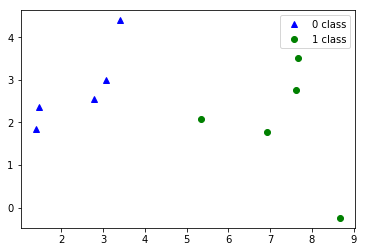

expected class: 0 predicted value: 0.2987569855650975 predicted class: 0
expected class: 0 predicted value: 0.14595105593031163 predicted class: 0
expected class: 0 predicted value: 0.08533326519733725 predicted class: 0
expected class: 0 predicted value: 0.21973731424800344 predicted class: 0
expected class: 0 predicted value: 0.24705900008926596 predicted class: 0
expected class: 1 predicted value: 0.9547021347460022 predicted class: 1
expected class: 1 predicted value: 0.8620341905282771 predicted class: 1
expected class: 1 predicted value: 0.9717729050420985 predicted class: 1
expected class: 1 predicted value: 0.9992954520878627 predicted class: 1
expected class: 1 predicted value: 0.9054893228110497 predicted class: 1


In [5]:
# Here's the contrived data set
%matplotlib inline
import matplotlib.pyplot as plt

dataset = [[2.7810836,2.550537003,0],
    [1.465489372,2.362125076,0],
    [3.396561688,4.400293529,0],
    [1.38807019,1.850220317,0],
    [3.06407232,3.005305973,0],
    [7.627531214,2.759262235,1],
    [5.332441248,2.088626775,1],
    [6.922596716,1.77106367,1],
    [8.675418651,-0.242068655,1],
    [7.673756466,3.508563011,1]]


# Do the graphing here
dataX0 = []
dataX1 = []
dataY0 = []
dataY1 = []
for i in dataset:
    if i[2] == 0:
        dataX0.append(i[0])
        dataY0.append(i[1])
    else:
        dataX1.append(i[0])
        dataY1.append(i[1])
        
plt.plot(dataX0, dataY0,'b^', label = '0 class')
plt.plot(dataX1, dataY1,'go', label = '1 class')
#plt.axis([0,6,0,6])
plt.legend()
plt.show()


# Call your predict function on the data here, using the following coefficients

coeffs = [-0.406605464, 0.852573316, -1.104746259]

predYData = [predictCLR(i, coeffs) for i in dataset]
for i in range(len(predYData)):
    print('expected class:', dataset[i][2], 'predicted value:', predYData[i], 'predicted class:', round(predYData[i]))
    



(d) Above I gave you coefficients. Just as with MLR, we need to estimate the coefficients for a data set. To do that, we're going to use stochastic gradient descent. The algorithm is exactly the same as for multivariate linear regression except for the following two things.

b0 is computed by:

b0 = b0 + learning_rate * error * predictedY * (1.0 - predictedY)

and bN is computed by:

bN = bN + learning_rate * error * predictedY * (1.0 - predictedY) * xN

for all coefficients b1..bN

Remember, to calculate the error, we run the algorithm with default coefficients and perform prediction, then get the error by subtracting the predictedY from the actual Y value.

Refer back to Assignment 4 for the complete algorithm

(d) Apply your function to the contrived dataset given above, using the learning rate of 0.3, and 100 epochs. Print the resulting coefficients. I've shown my last 5 epochs of this example.


In [6]:
# Write your function sgd_log(dataset, learning_rate, epochs) here
def sgd_log(dataset, learning_rate, epochs):
    coefficients = [0 for i in range(len(dataset[0]))]
    for e in range(epochs):
        totalError = 0
        for instance in dataset:
            predY = predictCLR(instance, coefficients)
            error = instance[-1] - predY
            totalError += error**2
            coefficients[0] += learning_rate*error*predY*(1.0-predY)
            for i in range(1,len(coefficients)):
                coefficients[i] += learning_rate*error*predY*(1.0-predY)*instance[i-1]
        print('epoch=', e, 'lrate=', learning_rate, 'error=%.3f' %totalError)
    return coefficients



# Call your function using the parameters given here. 

learning_rate = 0.3
epochs = 100
coeffs = sgd_log(dataset, learning_rate, epochs)
print(coeffs)


# Example output
#
#>epoch=95, lrate=0.300, error=0.023
#>epoch=96, lrate=0.300, error=0.023
#>epoch=97, lrate=0.300, error=0.023
#>epoch=98, lrate=0.300, error=0.023
#>epoch=99, lrate=0.300, error=0.022


epoch= 0 lrate= 0.3 error=2.217
epoch= 1 lrate= 0.3 error=1.613
epoch= 2 lrate= 0.3 error=1.113
epoch= 3 lrate= 0.3 error=0.827
epoch= 4 lrate= 0.3 error=0.623
epoch= 5 lrate= 0.3 error=0.494
epoch= 6 lrate= 0.3 error=0.412
epoch= 7 lrate= 0.3 error=0.354
epoch= 8 lrate= 0.3 error=0.310
epoch= 9 lrate= 0.3 error=0.276
epoch= 10 lrate= 0.3 error=0.248
epoch= 11 lrate= 0.3 error=0.224
epoch= 12 lrate= 0.3 error=0.205
epoch= 13 lrate= 0.3 error=0.189
epoch= 14 lrate= 0.3 error=0.174
epoch= 15 lrate= 0.3 error=0.162
epoch= 16 lrate= 0.3 error=0.151
epoch= 17 lrate= 0.3 error=0.142
epoch= 18 lrate= 0.3 error=0.134
epoch= 19 lrate= 0.3 error=0.126
epoch= 20 lrate= 0.3 error=0.119
epoch= 21 lrate= 0.3 error=0.113
epoch= 22 lrate= 0.3 error=0.108
epoch= 23 lrate= 0.3 error=0.103
epoch= 24 lrate= 0.3 error=0.098
epoch= 25 lrate= 0.3 error=0.094
epoch= 26 lrate= 0.3 error=0.090
epoch= 27 lrate= 0.3 error=0.087
epoch= 28 lrate= 0.3 error=0.084
epoch= 29 lrate= 0.3 error=0.080
epoch= 30 lrate= 0.3

### Part 4: Applying classification to real data

In this final section, we'll do the following things. 

(a) We need a function for calculating accuracy. It will take a list of actual class values, and predicted class values. If the actual value of an instance and the predicted value of an instance are the same, increment a counter. In the end, return the value of this counter divided by the length of the actual values list, multiplied by 100 - so we are returning a percentage of the classification we got correct. This function should be called accuracy(actual, predicted).

(b) We need a baseline function. Create a function called zeroRC(train, test). This function should take in the training data, and find the most common value of Y in the training data. It should then return a list of predictions the same length as the test data, containing ONLY this value that was most common in the training data. 

(c) I've given you the diabetes data set. You can find more about this data set here: https://www.kaggle.com/uciml/pima-indians-diabetes-database

You are going to:

- load the data
- print out some basic information about the data (number of instances, features)
- convert each string value to float (for all columns)
- normalize all columns in the range 0-1
- perform a 5-fold cross validation
    - using logistic regression
    - using a learning rate of 0.1, and 100 epochs
- collect predicted scores
- print the min, max and mean scores
- repeat the above, using zeroRC as the algorithm
- offer me some write up of the results




In [7]:
# Do all the code here
import statistics

def accuracy(actual, predicted):
    counter = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            counter += 1
    return counter*100/len(actual)

def zeroRC(train, test):
    trainY = [i[-1] for i in train]
    dataMode = statistics.mode(trainY)
    return [dataMode for i in test]

def clr(train, test, learning_rate, epochs):
    coefficients = sgd_log(train, learning_rate, epochs)
    print(coefficients)
    predictions = []
    for entry in test:
        prediction = predictCLR(entry, coefficients)
        predictions.append(round(prediction))
    return predictions

diabetesData = load_data('pima-indians-diabetes.csv')
print('Number of Instances:', len(diabetesData), 'Number of Features:', len(diabetesData[0]))
for column in range(len(diabetesData[0])):
    column2Float(diabetesData, column)


minmaxDiabetes = minmax(diabetesData)
normalize(diabetesData, minmaxDiabetes)

testData = diabetesData
learning_rate = 0.1
epochs = 100
numFolds = 5
sgd_result = evaluate_algorithm(testData,clr, numFolds,accuracy,learning_rate,epochs)
zeroRC_result = evaluate_algorithm(testData,zeroRC, numFolds,accuracy)
print('Log Reg:', sgd_result)
print('Log Reg Min: %.3f' % min(sgd_result), 'Log Reg Max: %.3f' % max(sgd_result), 'Log Reg Mean: %.3f' % mean(sgd_result))
print('zeroRC: ', zeroRC_result)
print('zeroRC Min: %.3f' % min(zeroRC_result), 'zeroRC Max: %.3f' % max(zeroRC_result), 'zeroRC Mean: %.3f' % mean(zeroRC_result))



Number of Instances: 768 Number of Features: 9
epoch= 0 lrate= 0.1 error=144.113
epoch= 1 lrate= 0.1 error=137.894
epoch= 2 lrate= 0.1 error=133.314
epoch= 3 lrate= 0.1 error=129.598
epoch= 4 lrate= 0.1 error=126.552
epoch= 5 lrate= 0.1 error=124.023
epoch= 6 lrate= 0.1 error=121.894
epoch= 7 lrate= 0.1 error=120.079
epoch= 8 lrate= 0.1 error=118.515
epoch= 9 lrate= 0.1 error=117.153
epoch= 10 lrate= 0.1 error=115.957
epoch= 11 lrate= 0.1 error=114.899
epoch= 12 lrate= 0.1 error=113.956
epoch= 13 lrate= 0.1 error=113.111
epoch= 14 lrate= 0.1 error=112.350
epoch= 15 lrate= 0.1 error=111.661
epoch= 16 lrate= 0.1 error=111.034
epoch= 17 lrate= 0.1 error=110.462
epoch= 18 lrate= 0.1 error=109.938
epoch= 19 lrate= 0.1 error=109.456
epoch= 20 lrate= 0.1 error=109.011
epoch= 21 lrate= 0.1 error=108.600
epoch= 22 lrate= 0.1 error=108.219
epoch= 23 lrate= 0.1 error=107.865
epoch= 24 lrate= 0.1 error=107.535
epoch= 25 lrate= 0.1 error=107.227
epoch= 26 lrate= 0.1 error=106.939
epoch= 27 lrate= 0

epoch= 37 lrate= 0.1 error=90.946
epoch= 38 lrate= 0.1 error=90.757
epoch= 39 lrate= 0.1 error=90.575
epoch= 40 lrate= 0.1 error=90.402
epoch= 41 lrate= 0.1 error=90.235
epoch= 42 lrate= 0.1 error=90.076
epoch= 43 lrate= 0.1 error=89.923
epoch= 44 lrate= 0.1 error=89.776
epoch= 45 lrate= 0.1 error=89.634
epoch= 46 lrate= 0.1 error=89.498
epoch= 47 lrate= 0.1 error=89.368
epoch= 48 lrate= 0.1 error=89.242
epoch= 49 lrate= 0.1 error=89.121
epoch= 50 lrate= 0.1 error=89.004
epoch= 51 lrate= 0.1 error=88.891
epoch= 52 lrate= 0.1 error=88.783
epoch= 53 lrate= 0.1 error=88.678
epoch= 54 lrate= 0.1 error=88.577
epoch= 55 lrate= 0.1 error=88.480
epoch= 56 lrate= 0.1 error=88.385
epoch= 57 lrate= 0.1 error=88.294
epoch= 58 lrate= 0.1 error=88.206
epoch= 59 lrate= 0.1 error=88.121
epoch= 60 lrate= 0.1 error=88.038
epoch= 61 lrate= 0.1 error=87.958
epoch= 62 lrate= 0.1 error=87.881
epoch= 63 lrate= 0.1 error=87.806
epoch= 64 lrate= 0.1 error=87.733
epoch= 65 lrate= 0.1 error=87.663
epoch= 66 lrat

epoch= 66 lrate= 0.1 error=94.896
epoch= 67 lrate= 0.1 error=94.846
epoch= 68 lrate= 0.1 error=94.797
epoch= 69 lrate= 0.1 error=94.749
epoch= 70 lrate= 0.1 error=94.703
epoch= 71 lrate= 0.1 error=94.658
epoch= 72 lrate= 0.1 error=94.615
epoch= 73 lrate= 0.1 error=94.573
epoch= 74 lrate= 0.1 error=94.533
epoch= 75 lrate= 0.1 error=94.493
epoch= 76 lrate= 0.1 error=94.455
epoch= 77 lrate= 0.1 error=94.418
epoch= 78 lrate= 0.1 error=94.382
epoch= 79 lrate= 0.1 error=94.347
epoch= 80 lrate= 0.1 error=94.313
epoch= 81 lrate= 0.1 error=94.279
epoch= 82 lrate= 0.1 error=94.247
epoch= 83 lrate= 0.1 error=94.216
epoch= 84 lrate= 0.1 error=94.186
epoch= 85 lrate= 0.1 error=94.156
epoch= 86 lrate= 0.1 error=94.127
epoch= 87 lrate= 0.1 error=94.099
epoch= 88 lrate= 0.1 error=94.072
epoch= 89 lrate= 0.1 error=94.045
epoch= 90 lrate= 0.1 error=94.019
epoch= 91 lrate= 0.1 error=93.994
epoch= 92 lrate= 0.1 error=93.970
epoch= 93 lrate= 0.1 error=93.946
epoch= 94 lrate= 0.1 error=93.922
epoch= 95 lrat

Write up your observations on the experiment here

Zero RC works worse than the linear regression classifier. This is because the data is split around 65% of the time one class, 35% of the time the other class so just choosing the most common class only has a maximum accuracy of 65%. The linear regression classifier has a median accuracy around 10% better than Zero RC but I would still not trust it to make a diagnosis. We also do not know from this what the false positive and false negative rates are.
